In [2]:
# Resnet example

In [1]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
#from google.colab import drive
from os import listdir
import numpy as np 
import cv2
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import warnings
import pandas as pd
import os 
import torch
from fastai.vision.data import *
import fastai
from pathlib import Path
from shutil import copyfile
import random
import shutil
from PIL import Image
from datetime import datetime
from hyperopt import hp
from hyperopt import fmin, tpe, space_eval


In [3]:
def get_float_label(x):
    y = str(x)[(len(path_str) + 1):(len(path_str) + 3)]
    dash_search = re.search("/", y)
    if dash_search != None:
        y = y[:dash_search.span()[0]]
    y = float(y)
    return y

In [ ]:
#import tensorflow as tf
#import tensorflow_addons as tfa

In [6]:
# Pictures must be put into folders based on pawpularity score
#data_dir = "data"
data_dir = "/media/revilo/oliver-kool-2/pawpularity_data"
train_df = pd.read_csv(f'{data_dir}/train.csv')
#matches = [np.where(x == train_df.Id.values)[0][0] for x in [y[:len(y)-4] for y in os.listdir("data/train_shrinked/")]]
matches = [np.where(x == train_df.Id.values)[0][0] for x in [y[:len(y)-4] for y in os.listdir(data_dir + "/train")]]

In [7]:
original_fnames = os.listdir(data_dir + "/train")
matching_pawp = train_df.iloc[matches,:].Pawpularity.values
target_dir = data_dir + "/train_for_resnet"
os.mkdir(target_dir)        

FileExistsError: [Errno 17] File exists: '/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet'

In [18]:
for i in range(len(original_fnames)):
    original_fname = f'{data_dir + "/train"}/{original_fnames[i]}'
    target_subdir = f'{target_dir}/{matching_pawp[i]}'
    target_fname = f'{target_subdir}/{original_fnames[i]}'
    
    try:
        os.mkdir(target_subdir)
    except :
        shutil.copyfile(original_fname, target_fname)
    shutil.copyfile(original_fname, target_fname)

In [15]:
path = Path("/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet")
warnings.filterwarnings('ignore')

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [16]:
data

ImageDataBunch;

Train: LabelList (7930 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
78,78,78,78,78
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Valid: LabelList (1982 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
73,55,21,17,25
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Test: None

In [24]:
np.array(data.classes)

array(['1', '10', '100', '11', ..., '96', '97', '98', '99'], dtype='<U3')

In [26]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [27]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,6.207334,5.055890,0.023713,01:06
1,5.631063,4.770941,0.036327,01:09
2,4.951646,4.550168,0.039354,01:12
3,4.531492,4.446661,0.042886,01:11
4,4.292295,4.396341,0.046922,01:08
5,4.095942,4.419350,0.037336,01:02
6,3.980246,4.402654,0.039354,01:02
7,3.862106,4.415644,0.039354,01:01
8,3.710547,4.410478,0.035822,01:01
9,3.586200,4.436357,0.041372,01:01


In [28]:
interp = ClassificationInterpretation.from_learner(learn)

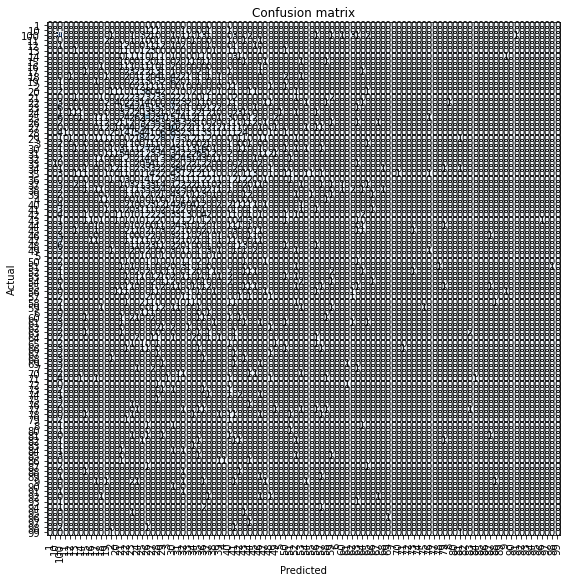

In [29]:
interp.plot_confusion_matrix(figsize = (8,8)) #change plot 


# Pawpularity score divided into 5 score intervals

In [104]:
import shutil
original_fnames = os.listdir(data_dir + "/train")
matching_pawp = train_df.iloc[matches,:].Pawpularity.values
target_dir = data_dir + "/train_for_resnet_w_intervals"
os.mkdir(target_dir)     

FileExistsError: [Errno 17] File exists: '/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet_w_intervals'

In [106]:
intervals = [20, 40 ,60, 80, 100]
for i in range(len(original_fnames)):
    original_fname = f'{data_dir + "/train"}/{original_fnames[i]}'
    which_interval = [((matching_pawp[i] > x -20) and (matching_pawp[i] <= x))  for x in intervals]
    target_subdir = f'{target_dir}/{intervals[np.where(which_interval)[0][0]]}'
    target_fname = f'{target_subdir}/{original_fnames[i]}'
    
    try:
        os.mkdir(target_subdir)
    except :
        shutil.copyfile(original_fname, target_fname)
    shutil.copyfile(original_fname, target_fname)

In [52]:
path = Path("/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet_w_intervals")
warnings.filterwarnings('ignore')

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [54]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [56]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,2.191972,1.489286,0.426337,01:02
1,1.647442,1.296510,0.470737,01:08
2,1.372855,1.242027,0.505550,01:07
3,1.290731,1.207066,0.526236,01:05
4,1.247902,1.201548,0.529263,01:01
5,1.200264,1.194610,0.535822,01:04
6,1.155569,1.183756,0.541877,01:04
7,1.119650,1.180990,0.539354,01:02


# Target as float, learning with MSE loss

https://btahir.medium.com/a-quick-guide-to-using-regression-with-image-data-in-fastai-117304c0af90

In [3]:
path_str = "/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet"
path = Path(path_str)

warnings.filterwarnings('ignore')

In [7]:
def get_float_label(x):
    y = str(x)[(len(path_str) + 1):(len(path_str) + 3)]
    dash_search = re.search("/", y)
    if dash_search != None:
        y = y[:dash_search.span()[0]]
    y = float(y)
    return y

In [85]:
#np.random.seed(42)
#tfms = get_transforms(do_flip=False)
##data = ImageDataBunch.from_folder(path,
##                                  train=".",
##                                  valid_pct=0.2,
##        ds_tfms=get_transforms(), size=224, num_workers=4)\
##        .split_subsets(train_size = 0.8, valid_size = 0.2)\
#data = ImageDataBunch.from_folder(path,
#                                  train=".",
#                                  valid_pct=0.2, num_workers=4)\
#        .split_none()\
#        .label_from_func(get_float_label, label_cls = 
#               FloatList)\
#        .transform(tfms, size=224)\
#        .databunch()\
#        .normalize(imagenet_stats)
#    
##.split_subsets(train_size = 0.8, valid_size = 0.2)\

You can deactivate this warning by passing `no_check=True`.


In [98]:
data = (ImageList.from_folder(path)\
        .random_split_by_pct()\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False), size=224)\
        .databunch())
data.normalize(imagenet_stats)    

ImageDataBunch;

Train: LabelList (7930 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
78.0,78.0,78.0,78.0,78.0
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Valid: LabelList (1982 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
81.0,27.0,68.0,36.0,36.0
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Test: None

In [99]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [102]:
learn = create_cnn(data, models.resnet34)

In [91]:
import torch.nn as nn

class L1LossFlat(nn.L1Loss):
#“Mean Absolute Error Loss”
  def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
    return super().forward(input.view(-1), target.view(-1))


In [146]:
learn.loss = MSELossFlat
#learn.loss = L1LossFlat

In [147]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,time
0,263.060089,306.811371,00:58
1,273.854462,305.023346,00:58
2,259.089752,302.488525,00:58
3,254.508224,304.820984,00:58


In [148]:
interp = ClassificationInterpretation.from_learner(learn)

In [136]:
interp.preds.reshape(-1).numpy()

array([37.8246  , 30.255648, 45.3668  , 47.59761 , ..., 33.979385, 44.48561 , 31.194057, 31.508108], dtype=float32)

In [137]:
def rmse(x, y):
    x = x.numpy()
    y = y.numpy()
    return np.sqrt(np.mean((x-y)**2))

17.303774

In [149]:
rmse(interp.preds.reshape(-1), 
    interp.y_true)    

17.459124

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

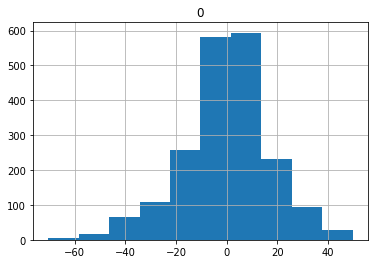

In [142]:
test = interp.preds.reshape(-1).numpy() - interp.y_true.numpy()
pd.DataFrame(test).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

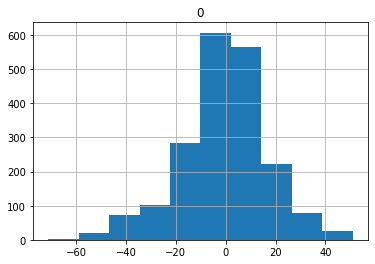

In [150]:
test = interp.preds.reshape(-1).numpy() - interp.y_true.numpy()
pd.DataFrame(test).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

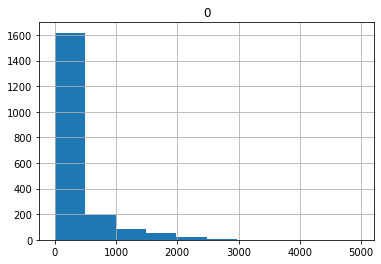

In [145]:
pd.DataFrame(interp.losses.numpy()).hist()

# Hyperopt with resnet

In [4]:
def objective(args):
    case, val = args
    if case == 'case 1':
        return val
    else:
        return val ** 2

# define a search space
space = hp.choice('a',
    [
        ('case 1', 1 + hp.lognormal('c1', 0, 1)),
        ('case 2', hp.uniform('c2', -10, 10)),
        ('case 3', hp.uniform('c3', 15, 20)),
        
    ])

# minimize the objective over the space

best = fmin(objective, space, algo=tpe.suggest, max_evals=100)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))
# -> ('case 2', 0.01420615366247227}

100%|██████████| 100/100 [00:00<00:00, 395.81trial/s, best loss: 0.0004412880730002756]
{'a': 1, 'c2': -0.02100685776122349}
('case 2', -0.02100685776122349)


In [8]:
# Set up framework with resnet
# 1) set dataloader
path_str = "/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet"
path = Path(path_str)

warnings.filterwarnings('ignore')

data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False), size=224)\
        .databunch())

data.normalize(imagenet_stats)   


ImageDataBunch;

Train: LabelList (7929 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
26.0,41.0,40.0,40.0,20.0
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Valid: LabelList (1982 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
31.0,35.0,27.0,20.0,23.0
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Test: None

In [9]:
# 2) space and objective function that returns rmse

space = hp.choice('a',
    [
        ('case 1', hp.uniform('c1', 0, 0.15)),
        ('case 2', hp.uniform('c2', 0.15, 0.3)),
        ('case 3', hp.uniform('c3', 0.3, 0.45))
    ])

def rmse_basic(x, y):
    return np.sqrt(np.mean((x-y)**2))

def objective(args):
    case, weight_decay = args
    
    learn = cnn_learner(data, models.resnet34)
    learn.loss = MSELossFlat
    learn.fit_one_cycle(3, wd = weight_decay)
    interp = ClassificationInterpretation.from_learner(learn)
    rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
        interp.y_true.numpy()) 
    return rmse_res


In [11]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=10)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))


  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,time
0,1223.204102,691.093506,01:01
1,421.515869,319.310028,01:01
2,305.308990,312.471863,01:01


 10%|█         | 1/10 [03:17<29:41, 197.91s/trial, best loss: 17.67687225341797]

epoch,train_loss,valid_loss,time
0,1186.891968,712.048828,00:59
1,413.235901,311.646515,00:58
2,307.553284,304.473206,01:00


 20%|██        | 2/10 [06:27<26:04, 195.55s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1178.470337,725.495605,01:00
1,421.482574,319.533813,01:00
2,314.950256,310.244720,00:59


 30%|███       | 3/10 [09:39<22:41, 194.48s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1202.503296,715.888550,00:59
1,412.726837,307.365814,01:01
2,310.091309,307.428925,01:00


 40%|████      | 4/10 [12:53<19:25, 194.18s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1186.711548,687.600464,00:59
1,409.867401,312.712982,00:59
2,316.012634,309.422211,00:59


 50%|█████     | 5/10 [16:04<16:06, 193.37s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1190.777100,704.061890,00:59
1,414.665131,319.346619,01:00
2,313.621002,310.968445,00:59


 60%|██████    | 6/10 [19:16<12:50, 192.74s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1195.053955,713.375183,00:59
1,415.721130,313.331512,00:59
2,316.283569,307.036133,00:59


 70%|███████   | 7/10 [22:26<09:36, 192.12s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1197.937744,705.572083,00:59
1,420.470673,315.223846,00:59
2,308.244720,308.501526,00:59


 80%|████████  | 8/10 [25:36<06:22, 191.36s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1192.354004,698.294373,00:59
1,407.601288,321.800446,00:59
2,309.729004,311.596558,00:59


 90%|█████████ | 9/10 [28:47<03:11, 191.12s/trial, best loss: 17.449161529541016]

epoch,train_loss,valid_loss,time
0,1183.123413,681.358276,01:00
1,413.886902,319.001770,00:59
2,307.891815,309.554474,00:59


100%|██████████| 10/10 [31:58<00:00, 191.87s/trial, best loss: 17.449161529541016]
{'a': 0, 'c1': 0.07451200385889463}
('case 1', 0.07451200385889463)


## Testing with paramaters (momentum, resnet type, weight_decay, different normalizations, transformations)

In [7]:
space = hp.choice('a',
    [
        ('case 1', 
         hp.uniform('c1', 0, 0.3), # weight decay
         hp.uniform('c2', 25, 75), # div_factor
         hp.uniform('c3',  0.6,0.85),  # momemtum1
         hp.uniform('c4',  0.86, 0.99),  # momemtum2
        )
    ])

def rmse_basic(x, y):
    return np.sqrt(np.mean((x-y)**2))

def objective(args):
    case, weight_decay,div_factor, momentum_1, momentum_2  = args
    
    learn = cnn_learner(data, models.resnet34)
    learn.loss = MSELossFlat
    learn.fit_one_cycle(2, 
                        wd = weight_decay,
                        div_factor =  div_factor,
                       moms = (momentum_1, momentum_2))
    interp = ClassificationInterpretation.from_learner(learn)
    rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
        interp.y_true.numpy()) 
    return rmse_res

In [6]:
path_str = "/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet"
path = Path(path_str)

warnings.filterwarnings('ignore')

data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False), size=224)\
        .databunch())

data.normalize(imagenet_stats)   


ImageDataBunch;

Train: LabelList (7929 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
20.0,37.0,33.0,56.0,33.0
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Valid: LabelList (1982 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
35.0,35.0,33.0,33.0,50.0
Path: /media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet;

Test: None

In [14]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=10)
print(best)
print(space_eval(space, best))

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,time
0,1073.324951,579.672852,00:58
1,394.631592,317.255615,00:58


 10%|█         | 1/10 [02:11<19:46, 131.81s/trial, best loss: 17.81167221069336]

epoch,train_loss,valid_loss,time
0,1027.981079,521.988586,00:59
1,386.990662,317.255646,00:59


 20%|██        | 2/10 [04:22<17:31, 131.41s/trial, best loss: 17.81167221069336]

epoch,train_loss,valid_loss,time
0,987.470093,459.540894,00:59
1,392.749084,315.271393,01:00


 30%|███       | 3/10 [06:33<15:20, 131.47s/trial, best loss: 17.755884170532227]

epoch,train_loss,valid_loss,time
0,1041.185303,536.061035,00:59
1,387.553711,313.080048,00:59


 40%|████      | 4/10 [08:44<13:06, 131.16s/trial, best loss: 17.69407081604004] 

epoch,train_loss,valid_loss,time
0,1048.753052,524.138855,00:58
1,391.917572,318.283844,00:59


 50%|█████     | 5/10 [10:54<10:54, 130.99s/trial, best loss: 17.69407081604004]

epoch,train_loss,valid_loss,time
0,1010.533813,486.248413,00:59
1,391.117493,319.097626,01:01


 60%|██████    | 6/10 [13:08<08:46, 131.63s/trial, best loss: 17.69407081604004]

epoch,train_loss,valid_loss,time
0,1058.815430,553.121155,01:01
1,392.662323,324.862518,01:01


 70%|███████   | 7/10 [15:22<06:37, 132.58s/trial, best loss: 17.69407081604004]

epoch,train_loss,valid_loss,time
0,1018.662842,511.704681,01:01
1,382.482330,319.368958,01:01


 80%|████████  | 8/10 [17:38<04:26, 133.49s/trial, best loss: 17.69407081604004]

epoch,train_loss,valid_loss,time
0,1037.462280,514.316650,01:01
1,386.726044,318.494293,01:01


 90%|█████████ | 9/10 [19:53<02:14, 134.02s/trial, best loss: 17.69407081604004]

epoch,train_loss,valid_loss,time
0,1059.235962,553.503113,00:59
1,394.519775,313.265350,01:00


100%|██████████| 10/10 [22:05<00:00, 132.55s/trial, best loss: 17.69407081604004]
{'a': 0, 'c1': 0.07511284940130389, 'c2': 66.40734302860156, 'c3': 0.662912762432217, 'c4': 0.9462651630396108}
('case 1', 0.07511284940130389, 66.40734302860156, 0.662912762432217, 0.9462651630396108)


In [15]:
# use the optimal parameters
opt_wd = 0.075
opt_div_factor = 66.4
mom1 = 0.66
mom2 = 0.94

learn = cnn_learner(data, models.resnet34)
learn.loss = MSELossFlat
learn.fit_one_cycle(12, wd = opt_wd,
                   div_factor = opt_div_factor,
                   moms = (mom1, mom2))

interp = ClassificationInterpretation.from_learner(learn)
rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
    interp.y_true.numpy()) 
print(rmse_res)

epoch,train_loss,valid_loss,time
0,1479.698364,1342.641846,00:58
1,574.064819,334.886505,00:58
2,343.660675,325.103302,00:58
3,306.231720,314.910217,00:58
4,296.483063,307.332977,00:58
5,272.686646,306.963257,00:58


17.520367


## With image transforms

In [ ]:
data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False), size=224)\
        .databunch())

data.normalize(imagenet_stats)   


In [ ]:
# transforms and other parameters..

#space = hp.choice('a',
#    [
#        ('case 1', 
#         None, # 
#         hp.uniform('c1', 0, 0.3), # weight decay
#         hp.uniform('c2', 0, 100), # div_factor
#        ),
#        ('case 2', 
#         hp.uniform(0, 360) # 0 to 360 degrees of rotation,
#         hp.uniform('c1', 0, 0.3), # weight decay
#         hp.uniform('c2', 0, 100), # div_factor
#        ),
#        ('case 3', 
#         hp.uniform(0, 360) # 0 to 360 degrees of rotation,
#         hp.uniform('c1', 0, 0.3), # weight decay
#         hp.uniform('c2', 0, 100), # div_factor
#        )
#    ])
#

In [26]:
# Only transformation space
space = hp.choice('a',
    [
        ('case 1', 
         None, # max_rotate
         1, # max zoom default
         0.75, # p_affine default,
         None, # max_lightning
         None # max_warp
        ),
        ('case 2', 
         hp.uniform("c1", 0, 360),
         hp.uniform("c2", 1, 5),
         hp.uniform("c3", 0, 0.99), # p_affine,
         hp.uniform("c4", 0, 0.99), # max_lighting
         hp.uniform("c5", 0.2, 0.8) # max warp 
        )
    ])


In [ ]:

#space = hp.choice('a',
#    [
#        ('case 1', hp.uniform('c1', 0, 0.15)),
#        ('case 2', hp.uniform('c2', 0.15, 0.3)),
#        ('case 3', hp.uniform('c3', 0.3, 0.45))
#    ])
#

In [27]:
def rmse_basic(x, y):
    return np.sqrt(np.mean((x-y)**2))

def objective(args):
    case, max_rotate, max_zoom, p_affine_zoom, max_lighting,max_warp  = args
    
    data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False,
                                 max_rotate = max_rotate,
                                 max_zoom = max_zoom,
                                 p_affine = p_affine_zoom,
                                 max_lighting = max_lighting,
                                 max_warp = max_warp), size=224)\
        .databunch())

    data.normalize(imagenet_stats) 
    
    learn = cnn_learner(data, models.resnet34)
    learn.loss = MSELossFlat
    learn.fit_one_cycle(3)
    interp = ClassificationInterpretation.from_learner(learn)
    rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
        interp.y_true.numpy()) 
    
    return rmse_res


# Only transformation space


In [28]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=10)
print(best)
print(space_eval(space, best))

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,time
0,1185.734863,637.225891,00:57
1,419.605774,314.413269,00:57
2,302.975494,307.288269,00:58


 10%|█         | 1/10 [03:06<28:00, 186.68s/trial, best loss: 17.529640197753906]

epoch,train_loss,valid_loss,time
0,1206.791382,677.615967,00:58
1,418.893707,316.133087,00:57
2,301.893158,308.178162,00:57


 20%|██        | 2/10 [06:13<24:53, 186.66s/trial, best loss: 17.529640197753906]

epoch,train_loss,valid_loss,time
0,1214.277222,619.422119,00:57
1,423.888306,292.056458,00:58
2,314.960114,285.554749,00:59


 30%|███       | 3/10 [09:22<21:51, 187.36s/trial, best loss: 16.898365020751953]

epoch,train_loss,valid_loss,time
0,1173.010986,675.203735,00:58
1,407.731659,326.320160,00:59
2,304.290497,320.898621,00:58


 40%|████      | 4/10 [12:30<18:46, 187.71s/trial, best loss: 16.898365020751953]

epoch,train_loss,valid_loss,time
0,1194.593140,671.738159,00:59
1,419.607910,321.857025,00:58
2,325.026672,314.113647,00:59


 50%|█████     | 5/10 [15:41<15:42, 188.48s/trial, best loss: 16.898365020751953]

epoch,train_loss,valid_loss,time
0,1186.071289,703.722900,00:57
1,407.178192,325.448334,00:57
2,306.601166,318.907043,00:57


 60%|██████    | 6/10 [18:47<12:31, 187.78s/trial, best loss: 16.898365020751953]

epoch,train_loss,valid_loss,time
0,1200.283813,635.512634,00:57
1,404.933258,319.062622,00:57
2,303.538055,308.894104,00:57


 70%|███████   | 7/10 [21:52<09:21, 187.05s/trial, best loss: 16.898365020751953]

epoch,train_loss,valid_loss,time
0,1195.689331,680.264282,00:57
1,406.325867,323.295105,00:57
2,300.283142,316.351501,00:57


 80%|████████  | 8/10 [24:57<06:12, 186.49s/trial, best loss: 16.898365020751953]

epoch,train_loss,valid_loss,time
0,1193.424561,642.889038,00:57
1,409.586273,321.028137,00:57
2,308.039001,312.637665,00:57


 90%|█████████ | 9/10 [28:02<03:06, 186.10s/trial, best loss: 16.898365020751953]

epoch,train_loss,valid_loss,time
0,1202.031128,677.931274,00:57
1,411.742462,324.099426,00:57
2,302.404114,317.494690,00:57


100%|██████████| 10/10 [31:08<00:00, 186.82s/trial, best loss: 16.898365020751953]
{'a': 0}
('case 1', None, 1, 0.75, None, None)


## Single case

Transformation explanations in greater detail:
https://fastai1.fast.ai/vision.transform.html

In [32]:
space = hp.choice('a',
    [('case 2', 
         hp.uniform("c1", 0, 360),
         hp.uniform("c2", 1, 5),
         hp.uniform("c3", 0, 0.99), # p_affine,
         hp.uniform("c4", 0, 0.99), # max_lighting
         hp.uniform("c5", 0.2, 0.8) # max warp 
        )
    ])

def rmse_basic(x, y):
    return np.sqrt(np.mean((x-y)**2))

def objective(args):
    case, max_rotate, max_zoom, p_affine_zoom, max_lighting,max_warp  = args
    
    data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False,
                                 max_rotate = max_rotate,
                                 max_zoom = max_zoom,
                                 p_affine = p_affine_zoom,
                                 max_lighting = max_lighting,
                                 max_warp = max_warp), size=224)\
        .databunch())

    data.normalize(imagenet_stats) 
    
    learn = cnn_learner(data, models.resnet34)
    learn.loss = MSELossFlat
    learn.fit_one_cycle(2)
    interp = ClassificationInterpretation.from_learner(learn)
    rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
        interp.y_true.numpy()) 
    
    return rmse_res



In [33]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=4)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))


  0%|          | 0/4 [00:00<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,time
0,1000.794861,467.616516,00:58
1,398.867126,326.243958,00:58


 25%|██▌       | 1/4 [02:09<06:29, 129.73s/trial, best loss: 18.062225341796875]

epoch,train_loss,valid_loss,time
0,1003.566223,442.553040,00:58
1,408.183228,315.180267,00:57


 50%|█████     | 2/4 [04:18<04:18, 129.48s/trial, best loss: 17.753318786621094]

epoch,train_loss,valid_loss,time
0,1024.034302,469.002991,00:58
1,424.189392,301.174103,00:58


 75%|███████▌  | 3/4 [06:27<02:09, 129.43s/trial, best loss: 17.354368209838867]

epoch,train_loss,valid_loss,time
0,1017.744202,452.227264,00:58
1,409.889130,325.139343,00:58


100%|██████████| 4/4 [08:37<00:00, 129.28s/trial, best loss: 17.354368209838867]
{'a': 0, 'c1': 318.19536444056473, 'c2': 1.9802515407546397, 'c3': 0.6989498283661812, 'c4': 0.7610336550569073, 'c5': 0.44596517735968866}
('case 2', 318.19536444056473, 1.9802515407546397, 0.6989498283661812, 0.7610336550569073, 0.44596517735968866)


## Loss function as hyperparameter

In [57]:
import torch.nn as nn

class L1LossFlat(nn.L1Loss):
#“Mean Absolute Error Loss”
  def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
    return super().forward(input.view(-1), target.view(-1))


def rmse_basic(x, y):
    return np.sqrt(np.mean((x-y)**2))

def objective(args):
    loss_fn  = args                        
    data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False), size=224)\
        .databunch())

    data.normalize(imagenet_stats) 
    
    learn = cnn_learner(data, models.resnet34)
    learn.loss = loss_fn
    learn.fit_one_cycle(2)
    #interp = ClassificationInterpretation.from_learner(learn)
    rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
        interp.y_true.numpy()) 
    
    return rmse_res

space = hp.choice('loss_fn', [MSELossFlat, 
                              L1LossFlat])

In [58]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=4)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))


  0%|          | 0/4 [00:00<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,time
0,985.979004,446.580750,01:01
1,388.395508,301.735931,01:01


 25%|██▌       | 1/4 [02:03<06:09, 123.21s/trial, best loss: 17.520366668701172]

epoch,train_loss,valid_loss,time
0,995.273865,446.855103,01:03
1,378.133392,316.453369,01:03


 50%|█████     | 2/4 [04:11<04:09, 124.83s/trial, best loss: 17.520366668701172]

epoch,train_loss,valid_loss,time
0,1004.686279,468.584198,01:03
1,376.896637,331.930420,01:03


 75%|███████▌  | 3/4 [06:20<02:06, 126.03s/trial, best loss: 17.520366668701172]

epoch,train_loss,valid_loss,time
0,986.654785,483.849945,01:03
1,382.216095,315.921204,01:03


100%|██████████| 4/4 [08:28<00:00, 127.19s/trial, best loss: 17.520366668701172]
{'loss_fn': 1}
<class '__main__.L1LossFlat'>


### Setting a larger search space - image transformations, loss function, momentum and weight decay

In [14]:
data = (ImageList.from_folder(path)\
    .split_subsets(train_size = 0.8, valid_size = 0.2)\
    .label_from_func(get_float_label, label_cls = 
           FloatList)\
    .transform(get_transforms(do_flip=False),
               size=224)\
    .pad(padding = 2, mode = "reflection")\
    .databunch())


AttributeError: pad

## Keep image transformations to those provided by get_transforms

In [3]:
path_str = "/media/revilo/oliver-kool-2/pawpularity_data/train_for_resnet"
path = Path(path_str)

warnings.filterwarnings('ignore')

import torch.nn as nn

class L1LossFlat(nn.L1Loss):
#“Mean Absolute Error Loss”
  def forward(self, input:Tensor, target:Tensor) -> Rank0Tensor:
    return super().forward(input.view(-1), target.view(-1))


In [48]:
space = hp.choice('a',
    [('MSE loss', 
        hp.choice('size', [64, 128, 224]), # image size
        hp.uniform('weight_dec', 0, 0.99), # weight decay
         hp.uniform('div_factor', 1, 100), # div_factor
         hp.uniform('mom1',  0.5,0.85),  # momemtum1
         hp.uniform('mom2',  0.86, 0.99),  # momemtum2
         hp.uniform("max_rotate", 0, 360), # rotation angle
         hp.uniform("max_zoom", 1, 3), # max_zoom
         hp.uniform("p_affine", 0, 0.99), # p_affine,
         hp.uniform("max_lighting", 0, 0.99), # max_lighting
         hp.uniform("max_warp", 0, 0.99),# max warp 
        hp.choice("loss_fn", [MSELossFlat, L1LossFlat]),
        hp.choice("model", [models.resnet18, models.resnet34,
                           models.resnet50])
     )
    ])
                  

def rmse_basic(x, y):
    return np.sqrt(np.mean((x-y)**2))

def objective(args):
    (label,
     size,
    weight_dec, 
    div_factor,
    mom1, 
    mom2, 
    max_rotate,
    max_zoom,
    p_affine,
    max_lighting, 
    max_warp,
    loss_fn,
    model) = args
    
    data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False,
                                 max_rotate = max_rotate,
                                 max_zoom = max_zoom,
                                 p_affine = p_affine,
                                 max_lighting = max_lighting,
                                 max_warp = max_warp), 
                   size=size)\
        .databunch())

    data.normalize(imagenet_stats) 
    
    learn = cnn_learner(data, model)
    learn.loss = loss_fn
    learn.fit_one_cycle(4,
                        div_factor = div_factor,
                        moms = (mom1, mom2),
                        wd = weight_dec)
    
    interp = ClassificationInterpretation.from_learner(learn)
    rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
        interp.y_true.numpy()) 
    
    return rmse_res
     

In [ ]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=30)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))

In [7]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=15)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,time
0,1267.760742,867.514954,00:46
1,462.193512,327.255280,00:46
2,358.498077,323.247375,00:47


  7%|▋         | 1/15 [02:33<35:54, 153.91s/trial, best loss: 17.979080200195312]

epoch,train_loss,valid_loss,time
0,1182.009399,627.065247,00:57
1,415.338409,333.287018,00:57
2,325.101074,330.156708,00:58


 13%|█▎        | 2/15 [05:40<35:26, 163.61s/trial, best loss: 17.979080200195312]

epoch,train_loss,valid_loss,time
0,1261.560669,714.676208,00:50
1,450.924286,321.061127,00:50
2,359.332123,312.440125,00:51


 20%|██        | 3/15 [08:24<32:45, 163.77s/trial, best loss: 17.675975799560547]

epoch,train_loss,valid_loss,time
0,1276.757690,790.922729,00:56
1,435.712311,303.944946,00:57
2,326.462921,299.811829,00:59


 27%|██▋       | 4/15 [11:30<31:14, 170.41s/trial, best loss: 17.31507682800293] 

epoch,train_loss,valid_loss,time
0,1210.422119,724.940186,00:59
1,408.735687,317.826447,00:58
2,306.905762,311.574127,00:58


 33%|███▎      | 5/15 [14:40<29:24, 176.48s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1281.897217,765.599976,00:48
1,460.264496,320.234772,00:48
2,340.781036,316.938751,00:48


 40%|████      | 6/15 [17:16<25:33, 170.35s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1196.231079,650.314087,00:50
1,440.383148,332.306610,00:51
2,335.008118,322.782135,00:51


 47%|████▋     | 7/15 [20:01<22:29, 168.66s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1265.192383,828.473694,00:47
1,443.856567,355.658081,00:48
2,358.577881,347.375031,00:48


 53%|█████▎    | 8/15 [22:36<19:12, 164.65s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1266.237183,778.315247,00:48
1,457.761780,335.984833,00:48
2,353.195068,325.600800,00:48


 60%|██████    | 9/15 [25:13<16:13, 162.18s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1235.708984,830.790894,00:48
1,457.260345,333.191254,00:48
2,354.489197,328.368896,00:48


 67%|██████▋   | 10/15 [27:49<13:21, 160.26s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1244.061035,777.697021,00:48
1,439.439667,371.526428,00:48
2,355.668121,357.949371,00:48


 73%|███████▎  | 11/15 [30:25<10:36, 159.12s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1283.556396,831.088440,00:48
1,463.487305,331.967255,00:48
2,355.767822,323.969208,00:48


 80%|████████  | 12/15 [33:01<07:54, 158.06s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1235.333984,781.502625,00:50
1,432.224152,361.337097,00:51
2,335.697540,340.467560,00:50


 87%|████████▋ | 13/15 [35:45<05:19, 159.85s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1228.725952,636.618164,00:51
1,425.120697,338.274353,00:50
2,350.031677,335.708344,00:50


 93%|█████████▎| 14/15 [38:29<02:41, 161.15s/trial, best loss: 17.31507682800293]

epoch,train_loss,valid_loss,time
0,1277.629883,764.202576,00:48
1,451.227997,333.686768,00:48
2,355.997681,324.585052,00:48


100%|██████████| 15/15 [41:05<00:00, 164.34s/trial, best loss: 17.31507682800293]
{'a': 0, 'div_factor': 84.06199804892059, 'loss_fn': 0, 'max_lighting': 0.5819333016727549, 'max_rotate': 64.45820379448219, 'max_warp': 0.310796224300883, 'max_zoom': 2.814801131922949, 'model': 0, 'mom1': 0.8077997749783944, 'mom2': 0.9340540761788665, 'p_affine': 0.2771649171101756, 'size': 2, 'weight_dec': 0.7177419099760465}
('MSE loss', 224, 0.7177419099760465, 84.06199804892059, 0.8077997749783944, 0.9340540761788665, 64.45820379448219, 2.814801131922949, 0.2771649171101756, 0.5819333016727549, 0.310796224300883, <function MSELossFlat at 0x7f3fbaf179d0>, <function resnet18 at 0x7f3fba7d8ee0>)


In [58]:
80*3*3/60

12.0

In [54]:
def objective(args):
    (label,
     size,
    weight_dec, 
    div_factor,
    mom1, 
    mom2, 
    max_rotate,
    max_zoom,
    p_affine,
    max_lighting, 
    max_warp,
    loss_fn,
    model) = args
    
    data = (ImageList.from_folder(path)\
        .split_subsets(train_size = 0.8, valid_size = 0.2)\
        .label_from_func(get_float_label, label_cls = 
               FloatList)\
        .transform(get_transforms(do_flip=False,
                                 max_rotate = max_rotate,
                                 max_zoom = max_zoom,
                                 p_affine = p_affine,
                                 max_lighting = max_lighting,
                                 max_warp = max_warp), 
                   size=size)\
        .databunch())

    data.normalize(imagenet_stats) 
    
    learn = cnn_learner(data, model)
    learn.loss = loss_fn
    learn.fit_one_cycle(3,
                        div_factor = div_factor,
                        moms = (mom1, mom2),
                        wd = weight_dec)
    
    interp = ClassificationInterpretation.from_learner(learn)
    rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
        interp.y_true.numpy()) 
        
    del learn
    #torch.cuda.empty_cache()
    print("RMSE: " +  str(rmse_res))
    return rmse_res
     

In [55]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=15)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

epoch,train_loss,valid_loss,time
0,1271.147949,791.646545,00:50
1,438.399750,347.571289,00:51
2,356.219666,335.796417,00:51


RMSE: 18.324749                                       
  7%|▋         | 1/15 [02:44<38:19, 164.27s/trial, best loss: 18.324748992919922]

epoch,train_loss,valid_loss,time
0,1209.299805,725.919861,01:00
1,428.815613,343.566864,01:00
2,335.546875,335.338806,01:00


RMSE: 18.312258                                                                  
 13%|█▎        | 2/15 [06:00<37:38, 173.76s/trial, best loss: 18.312257766723633]

epoch,train_loss,valid_loss,time
0,1267.206787,801.085327,00:51
1,447.197723,364.374023,00:50
2,341.170715,352.977081,00:51


RMSE: 18.787683                                                                  
 20%|██        | 3/15 [08:44<34:12, 171.05s/trial, best loss: 18.312257766723633]

epoch,train_loss,valid_loss,time
0,1254.881714,814.471436,00:51
1,449.181152,363.532898,00:51
2,350.786804,351.620239,00:51


RMSE: 18.751541                                                                  
 27%|██▋       | 4/15 [11:30<31:03, 169.44s/trial, best loss: 18.312257766723633]

epoch,train_loss,valid_loss,time
0,1238.494385,591.952209,01:07
1,431.365479,306.591736,01:06
2,353.762695,301.706604,01:06


RMSE: 17.369703                                                                  
 33%|███▎      | 5/15 [15:05<30:29, 182.97s/trial, best loss: 17.36970329284668] 

epoch,train_loss,valid_loss,time


 33%|███▎      | 5/15 [15:25<30:51, 185.11s/trial, best loss: 17.36970329284668]


KeyboardInterrupt: 

In [ ]:


dt = datetime.fromtimestamp(mktime(t1))
learn.export(f'{model}{str(dt)}')

In [44]:
data = (ImageList.from_folder(path)\
    .split_by_rand_pct(valid_pct = 0.2)\
    .label_from_func(get_float_label, label_cls = 
           FloatList)\
    .transform(get_transforms(do_flip=False), 
               size=224)\
    .databunch())

data.normalize(imagenet_stats) 

learn = cnn_learner(data, models.resnet34)
learn.loss = MSELossFlat
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,time
0,1542.160400,1532.816650,00:59
1,1332.272583,1130.776001,01:00
2,541.828796,351.532593,00:58
3,350.396637,338.790588,00:58
4,311.046631,330.791321,01:00
5,296.178528,326.870880,00:58
6,286.924286,326.167908,00:58
7,276.945679,326.528534,00:58
8,268.693939,324.817780,00:58
9,259.412903,325.624878,00:58


In [45]:
interp = ClassificationInterpretation.from_learner(learn)

In [14]:
# how much data there is in the training folder?
# to get a prediction for both test and train
data_dir = "/media/revilo/oliver-kool-2/pawpularity_data"

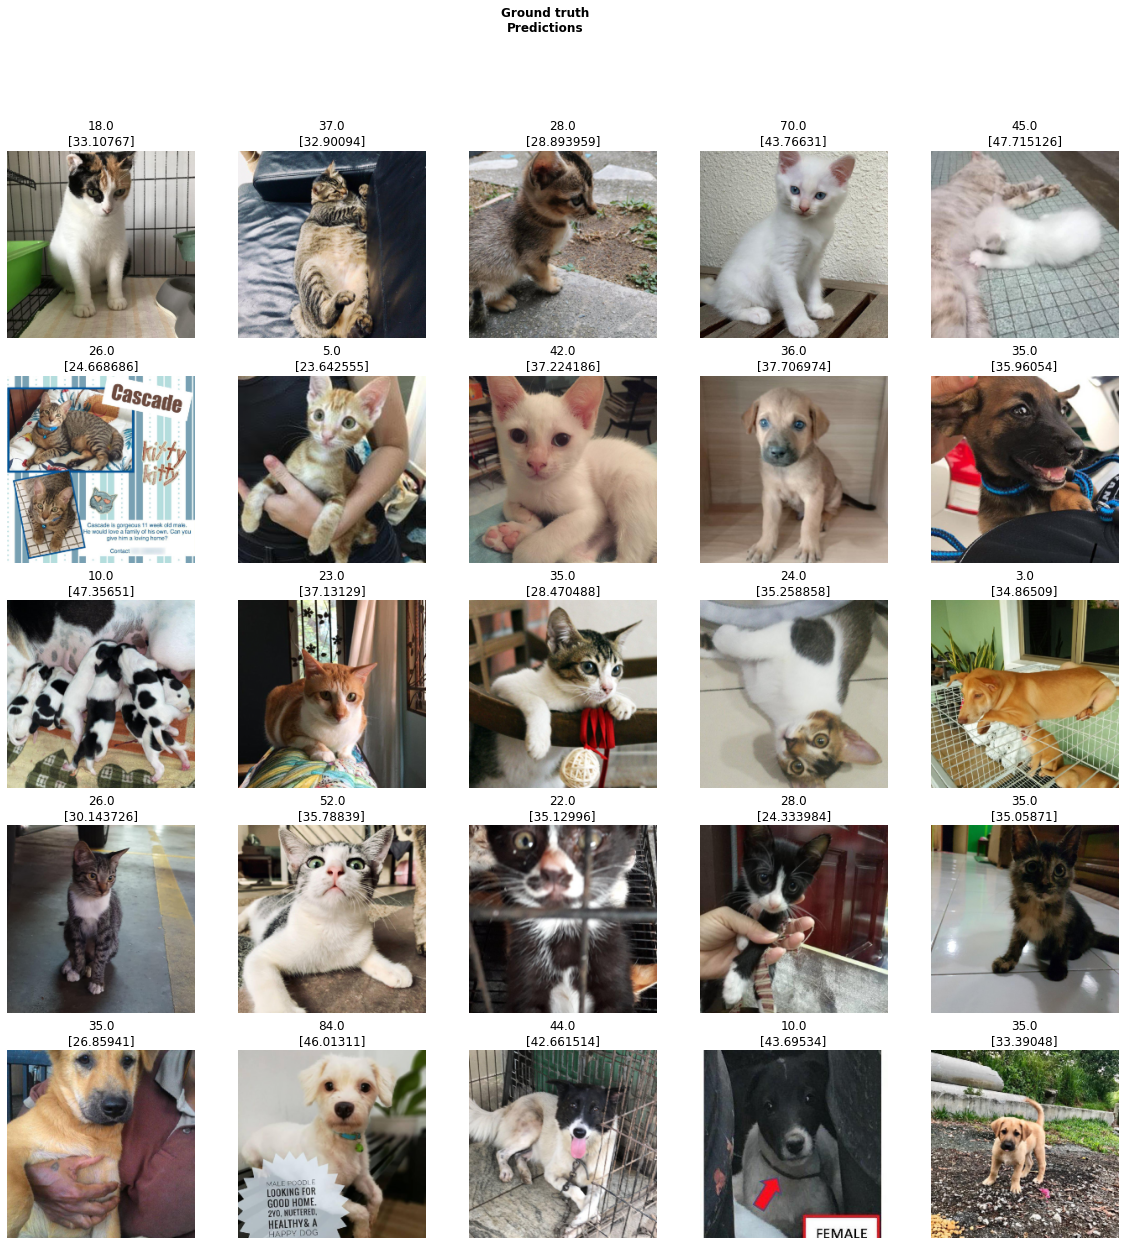

In [46]:
learn.show_results()

In [25]:
all_preds = learn.get_preds()

In [35]:
all_preds[1].shape#[1]#.shape

torch.Size([1982])

In [ ]:
all_preds#[0]#.shape

In [19]:
np.array(os.listdir("/media/revilo/oliver-kool-2/pawpularity_data/train")).shape

(9912,)

In [36]:
rmse_res = rmse_basic(interp.preds.numpy().reshape(-1), 
    interp.y_true.numpy()) 

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

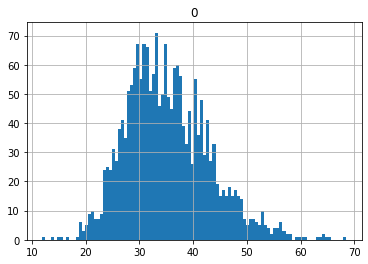

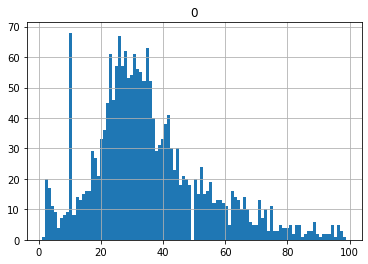

In [47]:
# histogram of actual versus predicted pawpularity
display(pd.DataFrame(interp.preds.numpy().reshape(-1)).hist(bins = 100))
pd.DataFrame(interp.y_true.numpy()).hist(bins = 100)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

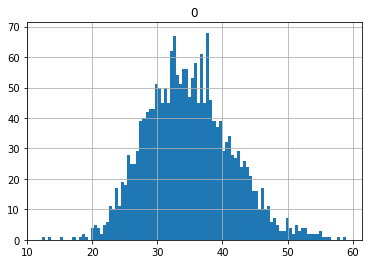

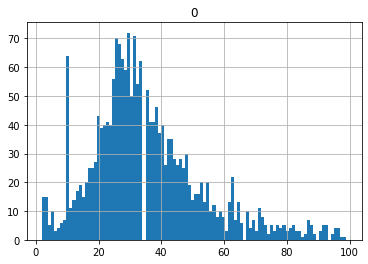

In [43]:
# histogram of actual versus predicted pawpularity
display(pd.DataFrame(interp.preds.numpy().reshape(-1)).hist(bins = 100))
pd.DataFrame(interp.y_true.numpy()).hist(bins = 100)

In [ ]:
best = fmin(objective, space, algo=tpe.suggest, max_evals=2)

print(best)
# -> {'a': 1, 'c2': 0.01420615366247227}
print(space_eval(space, best))